In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#import data
df=pd.read_csv(r"C:\Users\legac\data\kc_house_data.csv")

#view data
print(df.shape)
df.info()
df.head()

(30155, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
df.describe().sort_values("price")

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
print(df.isna().sum())

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64


In [5]:
#Deal with Outliers

#A House must have bedrooms. Houses with 10 or greater are rare, and therefore our model wouldn't be useful for them
df.drop(df[(df['bedrooms']==0) | (df['bedrooms']>=10)].index, inplace = True)

#Drop 3 in sqft_living and anything smaller than 180sqft in sqft_garage
df.drop(df[(df['sqft_living']==3)].index, inplace = True)
df.drop(df[(df['sqft_garage']<=180)].index, inplace = True)

In [6]:
df['heat_source'].unique()

array(['Gas', 'Electricity', 'Oil', 'Electricity/Solar', 'Gas/Solar',
       'Other', nan, 'Oil/Solar'], dtype=object)

In [7]:
df['sewer_system'].unique()

array(['PUBLIC', 'PRIVATE', 'PRIVATE RESTRICTED', nan,
       'PUBLIC RESTRICTED'], dtype=object)

In [8]:
df.dropna(how = 'any', inplace=True)

In [9]:
#Fixing the "renovations data." How many houses have never been renovated?
(df[df['yr_renovated']==0].shape)[0]

19254

In [10]:
# Categorize renovation's ages (How recent was the house renovated?)

df['renovations']=''
def renovation_time(df):
    t=''
    x=df['yr_renovated']
    if(x==0):
        t='Never'
    elif(x<2000):
        t='Outdated'
    elif(x in range(2001, 2010)):
        t='Old'
    elif(x in range(2011, 2016)):
        t='Somewhat Recent'
    elif(x>2016):
        t='Recent'
    return t

df['renovations']=df.apply(renovation_time,axis=1)
df.renovations.value_counts()

Never              19254
Outdated             207
Old                  139
Recent               104
Somewhat Recent       56
                      55
Name: renovations, dtype: int64

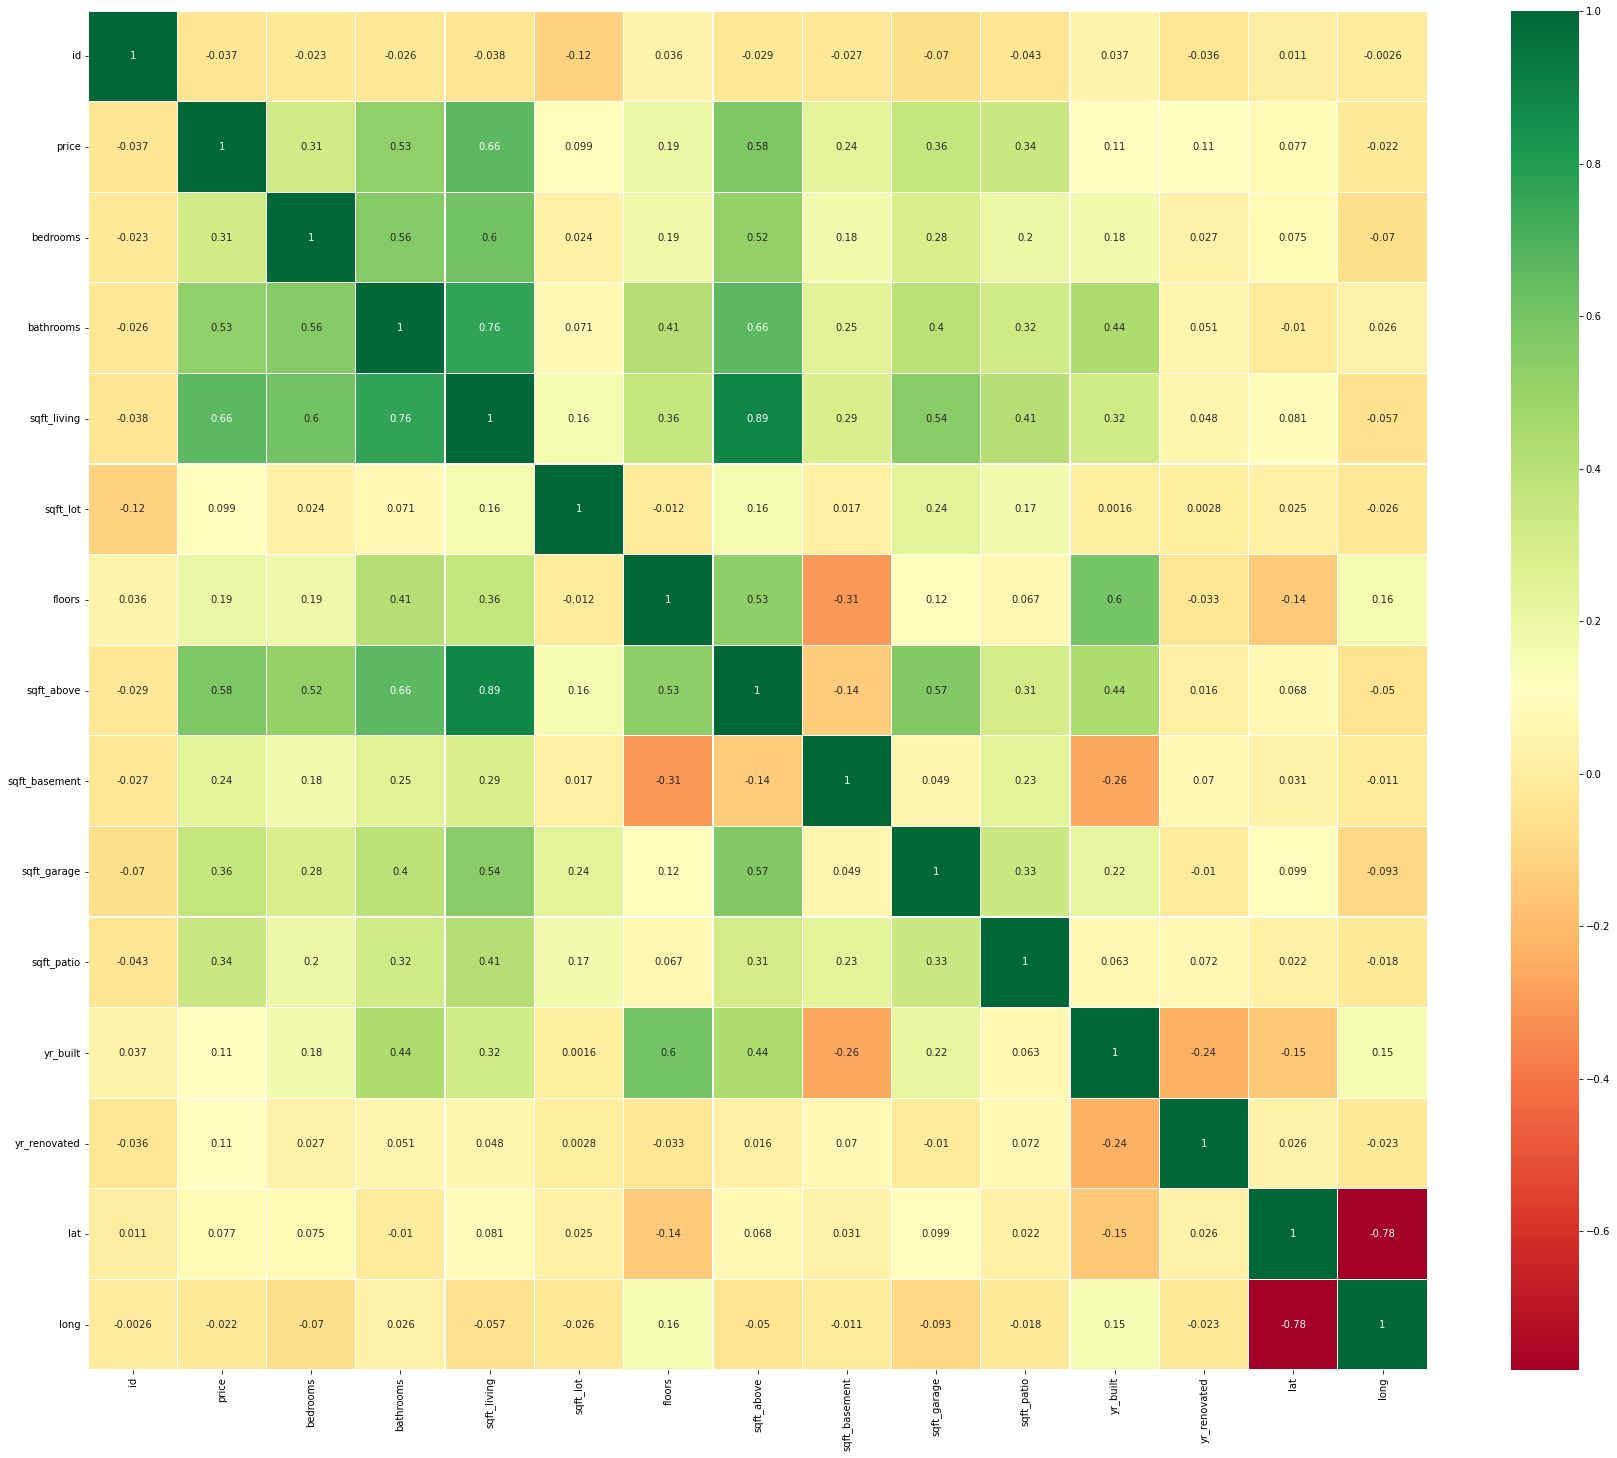

In [11]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,25)
plt.show()

In [12]:
df.drop(['id', 'date', 'view', 'lat', 'long', 'floors', 'address', 'sqft_above', 'sqft_basement'], axis=1, inplace=True)

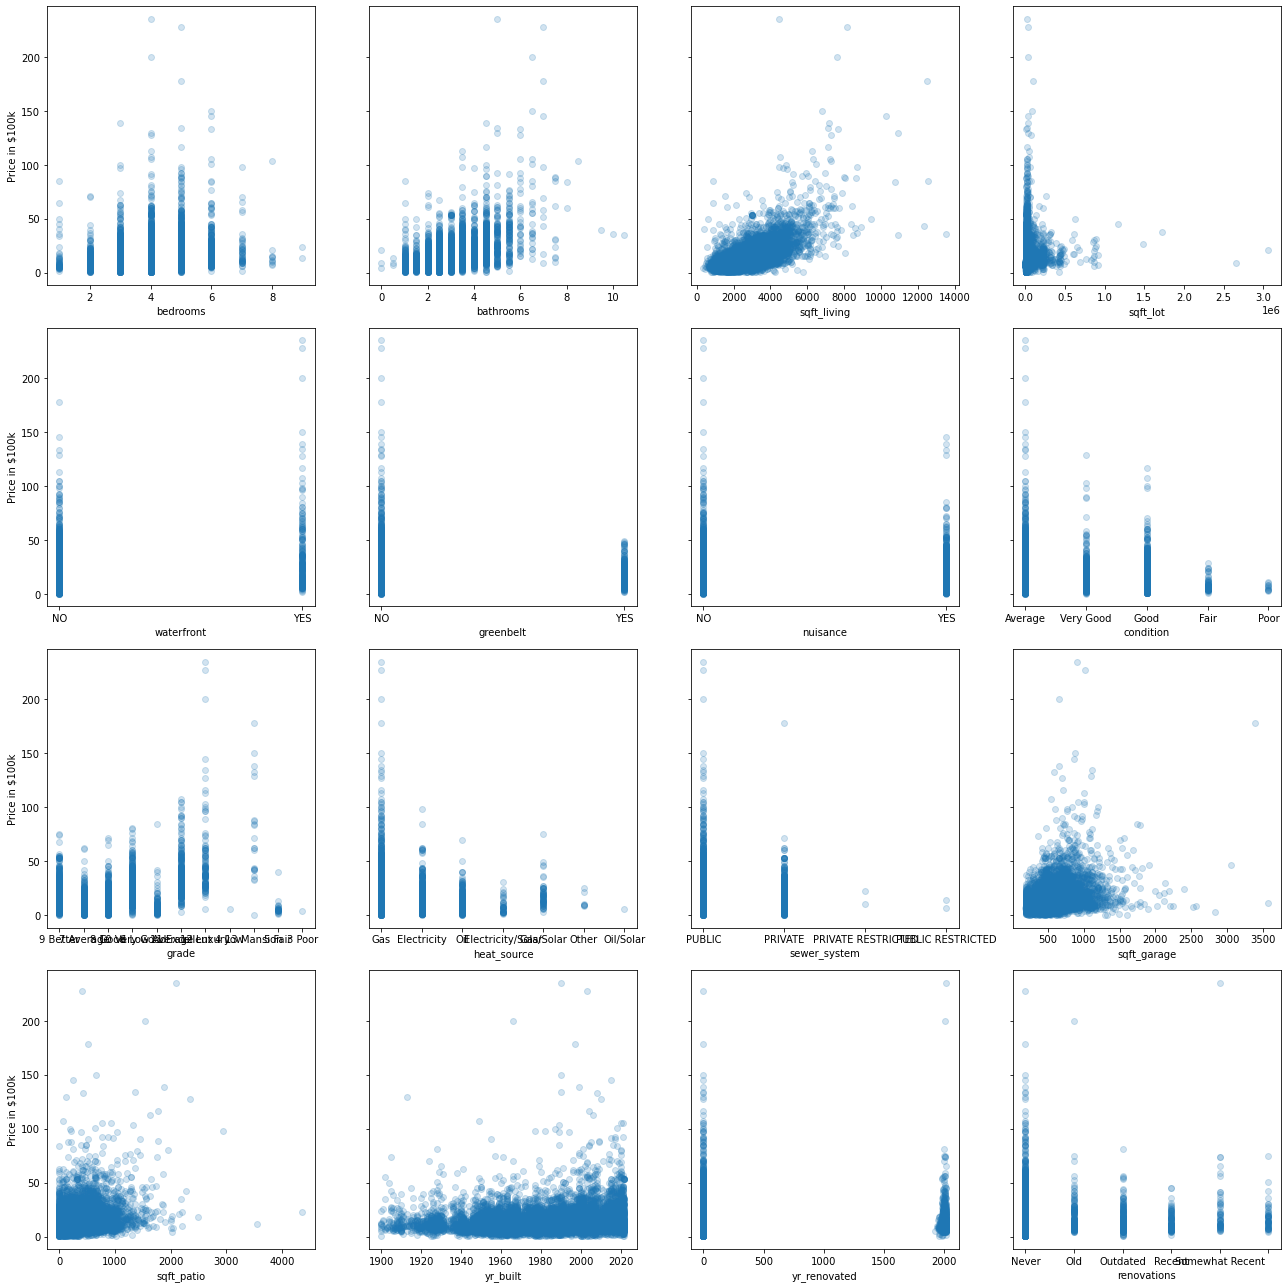

In [13]:
y = df["price"]/100000
x = df.drop("price", axis=1)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,18), sharey=True)

for i, column in enumerate(x.columns):
    # Locate applicable axes
    row = i // 4
    col = i % 4
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(x[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("Price in $100k")

fig.tight_layout()

C:\Users\legac\miniconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


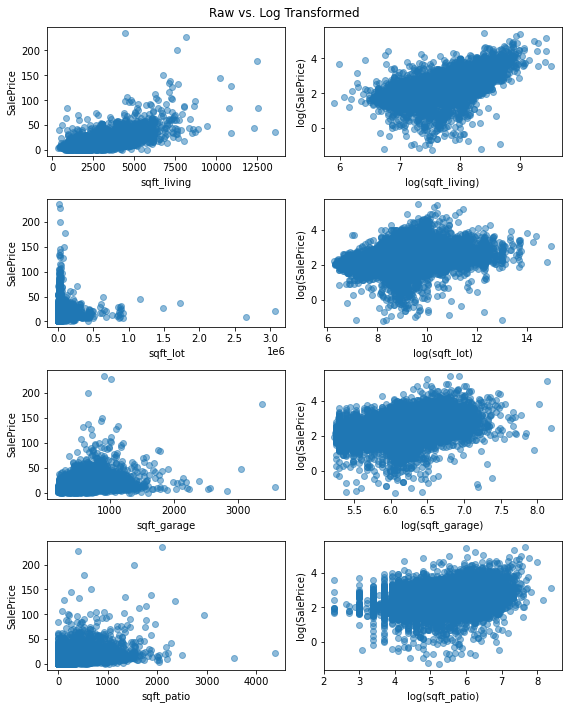

In [14]:
#Check to see if Transforming is better
continuous = ['sqft_living', 'sqft_lot', 'sqft_garage', 'sqft_patio']

fig, axes = plt.subplots(ncols=2, nrows=len(continuous), figsize=(8,10))

for i, column in enumerate(continuous):
    # Plot raw version
    left_ax = axes[i][0]
    left_ax.scatter(df[column], y, alpha=0.5)
    left_ax.set_xlabel(column)
    left_ax.set_ylabel("SalePrice")
    
    # Plot log transformed version
    right_ax = axes[i][1]
    right_ax.scatter(np.log(df[column]), np.log(y), alpha=0.5)
    right_ax.set_xlabel(f"log({column})")
    right_ax.set_ylabel("log(SalePrice)")
    
fig.suptitle("Raw vs. Log Transformed")

fig.tight_layout()

In [15]:
categoricals = ['renovations', 'waterfront', 'greenbelt', 'nuisance', 'condition', 'heat_source', 'sewer_system', 'grade']
df_cat = df[categoricals]

# add price to df   
df_cat['price'] = df['price']

df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19815 entries, 3 to 30154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   renovations   19815 non-null  object 
 1   waterfront    19815 non-null  object 
 2   greenbelt     19815 non-null  object 
 3   nuisance      19815 non-null  object 
 4   condition     19815 non-null  object 
 5   heat_source   19815 non-null  object 
 6   sewer_system  19815 non-null  object 
 7   grade         19815 non-null  object 
 8   price         19815 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.5+ MB


<ipython-input-15-b35e94203830>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['price'] = df['price']


In [22]:
cat_enc = pd.get_dummies(df_cat, drop_first=True)
cat_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19815 entries, 3 to 30154
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            19815 non-null  float64
 1   renovations_Never                19815 non-null  uint8  
 2   renovations_Old                  19815 non-null  uint8  
 3   renovations_Outdated             19815 non-null  uint8  
 4   renovations_Recent               19815 non-null  uint8  
 5   renovations_Somewhat Recent      19815 non-null  uint8  
 6   waterfront_YES                   19815 non-null  uint8  
 7   greenbelt_YES                    19815 non-null  uint8  
 8   nuisance_YES                     19815 non-null  uint8  
 9   condition_Fair                   19815 non-null  uint8  
 10  condition_Good                   19815 non-null  uint8  
 11  condition_Poor                   19815 non-null  uint8  
 12  condition_Very Goo

In [17]:
#Log transform the continuous

df_continuous = np.log(df[continuous])

non_categoricals = ['bedrooms', 'bathrooms', 'yr_built']

df_num = df_continuous.join(df[non_categoricals])

df_num['price'] = df['price']

df_num.replace([np.inf, -np.inf], 0, inplace=True)

df_num.head()

<ipython-input-17-87ca18b42d77>:3: RuntimeWarning: divide by zero encountered in log
  df_continuous = np.log(df[continuous])


,sqft_living,sqft_lot,sqft_garage,sqft_patio,bedrooms,bathrooms,yr_built,price
3,7.677864,7.244228,5.298317,5.598422,3,3.0,2010,775000.0
4,7.021084,6.630683,6.309918,3.401197,2,2.0,2012,592500.0
5,7.081709,8.646114,5.703782,0.000000,2,1.0,1948,625000.0
7,7.702556,8.162231,6.086775,5.327876,3,2.5,2019,820000.0
8,7.757906,9.002701,6.086775,4.248495,4,2.5,1989,780000.0


In [18]:
model_1 = smf.ols(formula="price ~ bedrooms + bathrooms + sqft_living + sqft_lot + sqft_patio + yr_built" , data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     3038.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:09:16   Log-Likelihood:            -2.9383e+05
No. Observations:               19815   AIC:                         5.877e+05
Df Residuals:                   19808   BIC:                         5.877e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.121e+07   4.25e+05     26.403      0.000    1.04e+07     1.2e+07
bedrooms    -1.757e+05   7066.178    -24.870      0.000    -1.9e+05   -1.62e+05
bathrooms    1.635e+05   9482.458     17.239      0.000    1.45e+05    1.82e+05
sqft_living   632.8355      8.285     76.387      0.000     616.597     649.074
sqft_lot       -0.4778      0.090     -5.311      0.000      -0.654      -0.301
sqft_patio    223.7217     20.818     10.747      0.000     182.918     264.526
yr_built    -5709.3423    216.461    -26.376      0.000   -6133.624   -5285.061
==============================================================================
Omnibus:                    22745.336   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8993158.762
Skew:                           5.487   Prob(JB):                         0.00
Kurtosis:                     106.789   Cond. No.                     5.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model_2 = smf.ols(formula="price ~ bedrooms + bathrooms + sqft_living + sqft_lot + sqft_garage + sqft_patio + yr_built" , data=df_num).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     1765.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:09:16   Log-Likelihood:            -2.9549e+05
No. Observations:               19815   AIC:                         5.910e+05
Df Residuals:                   19807   BIC:                         5.911e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.098e+06   5.07e+05     10.050      0.000     4.1e+06    6.09e+06
bedrooms    -1.545e+05   7892.913    -19.571      0.000    -1.7e+05   -1.39e+05
bathrooms      3.5e+05      1e+04     34.855      0.000     3.3e+05     3.7e+05
sqft_living  1.081e+06   2.38e+04     45.308      0.000    1.03e+06    1.13e+06
sqft_lot     1.288e+04   7388.243      1.743      0.081   -1600.766    2.74e+04
sqft_garage  7.321e+04   1.88e+04      3.894      0.000    3.64e+04     1.1e+05
sqft_patio  -3517.1097   2531.889     -1.389      0.165   -8479.824    1445.605
yr_built    -6596.8866    257.831    -25.586      0.000   -7102.258   -6091.516
==============================================================================
Omnibus:                    23673.637   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8697411.920
Skew:                           5.961   Prob(JB):                         0.00
Kurtosis:                     104.942   Cond. No.                     1.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model_3 = smf.ols(formula="price ~ waterfront + nuisance + renovations + grade + condition + heat_source + sewer_system", data=cat_enc).fit()
model_3.summary()

PatsyError: Error evaluating factor: NameError: name 'heat_source' is not defined
    price ~ waterfront + nuisance + renovations + grade + condition + heat_source + sewer_system
                                                                      ^^^^^^^^^^^

In [ ]:
model_3 = smf.ols(formula="price ~ bedrooms + bathrooms + sqft_living + sqft_lot + sqft_garage + sqft_patio + yr_built + waterfront + greenbelt + nuisance", data=df).fit()
model_3.summary()

In [ ]:
model_3 = smf.ols(formula="price ~ waterfront + nuisance + renovations + grade + condition + heat_source + sewer_system", data=df).fit()
model_3.summary()

In [ ]:
#Residuals
residuals = model_3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

In [ ]:
ohe = pd.get_dummies(df['condition'], drop_first=True) 
df = df.drop('condition',axis = 1)
df = df.join(ohe)

ohe_2 = pd.get_dummies(df['grade'], drop_first=True) 
df = df.drop('grade',axis = 1)
df = df.join(ohe_2)

ohe_3 = pd.get_dummies(df['heat_source'], drop_first=True) 
df = df.drop('heat_source',axis = 1)
df = df.join(ohe_3)

ohe_4 = pd.get_dummies(df['sewer_system'], drop_first=True) 
df = df.drop('sewer_system',axis = 1)
df = df.join(ohe_4)